## Cationic and Anionic Dyes Removal

In [14]:
# Import basic libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# import datawig
# import missingno as msno

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

print('Imports complete!')

Imports complete!


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy #for what? It's a library that let us copy things
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Data import and exploratory

In [15]:
data = pd.read_csv('msn_dye_adsorption.csv', index_col=None)

data.head()


,Time,Functional group,Dose,Initial_conc,pH,Dye_type,Removal_eff
0,60,MSN,0.5,20,3.15,CV,16.173511
1,60,MSN,0.5,20,4.95,CV,39.461475
2,60,MSN,0.5,20,7.56,CV,68.610607
3,60,MSN,0.5,20,9.30,CV,94.011600
4,60,MSN,0.5,20,10.80,CV,13.991432


In [16]:
df = pd.read_csv('msn_dye_adsorption.csv', index_col=None)

df.head()


,Time,Functional group,Dose,Initial_conc,pH,Dye_type,Removal_eff
0,60,MSN,0.5,20,3.15,CV,16.173511
1,60,MSN,0.5,20,4.95,CV,39.461475
2,60,MSN,0.5,20,7.56,CV,68.610607
3,60,MSN,0.5,20,9.30,CV,94.011600
4,60,MSN,0.5,20,10.80,CV,13.991432


In [33]:
#To convert categorical data using OneHot Encoder
df_encoded = pd.get_dummies(df, columns=['Functional group', 'Dye_type'])

# Display the transformed DataFrame
# print(df_encoded)

In [ ]:
df_cat =  df['Functional group', 'Dye_type']

In [36]:
# Using sklearn preprocessing for LabelEncoder
df2 = df

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to categorical columns
df2['Functional group'] = le.fit_transform(df2['Functional group'])
df2['Dye_type'] = le.fit_transform(df2['Dye_type'])

df2.head()

,Time,Functional group,Dose,Initial_conc,pH,Dye_type,Removal_eff
0,60,1,0.5,20,3.15,0,16.173511
1,60,1,0.5,20,4.95,0,39.461475
2,60,1,0.5,20,7.56,0,68.610607
3,60,1,0.5,20,9.30,0,94.011600
4,60,1,0.5,20,10.80,0,13.991432


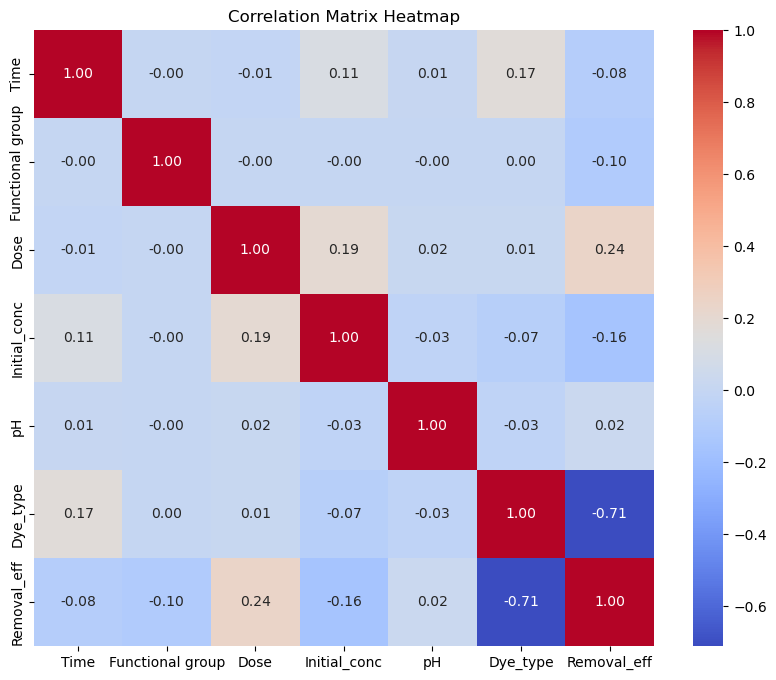

In [37]:
# Calculate the correlation matrix for numerical columns
# correlation_matrix = df_encoded.corr()
correlation_matrix = df2.corr()

# Display the correlation matrix
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [38]:
# for label in df_encoded.columns[1:6]:
#   plt.scatter(df[label], df['Removal_eff'])
#   plt.title(label)
#   plt.ylabel('Removal efficiency (%)')
#   plt.xlabel(label)
#   plt.show()

In [40]:
df2.describe()

,Time,Functional group,Dose,Initial_conc,pH,Dye_type,Removal_eff
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,53.793103,1.000000,0.681897,27.448276,6.598103,0.396552,38.472305
std,29.641066,0.818853,0.492695,15.302921,1.583675,0.490593,31.470395
min,5.000000,0.000000,0.100000,1.000000,2.270000,0.000000,0.255769
25%,30.000000,0.000000,0.500000,20.000000,6.360000,0.000000,9.467179
50%,60.000000,1.000000,0.500000,20.000000,6.560000,0.000000,29.634976
75%,60.000000,2.000000,1.000000,50.000000,6.560000,1.000000,57.609068
max,150.000000,2.000000,2.500000,50.000000,11.010000,1.000000,100.000000


In [41]:
# corr_matrix = data.corr()
corr_matrix = df2.corr()

print(corr_matrix['Removal_eff'].sort_values(ascending=False))
# data.describe()

Removal_eff         1.000000
Dose                0.239207
pH                  0.024715
Time               -0.082363
Functional group   -0.104684
Initial_conc       -0.159777
Dye_type           -0.710162
Name: Removal_eff, dtype: float64


In [ ]:
corr_matrix2 = data2.corr()

print(corr_matrix2['Yield'].sort_values(ascending=False))
data2.describe()

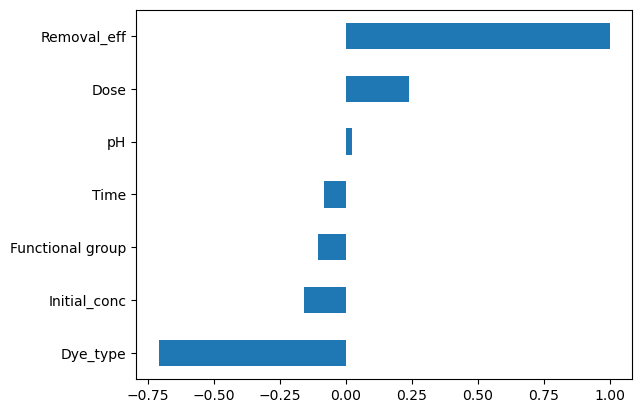

In [42]:
corr_matrix['Removal_eff'].sort_values().plot.barh()
plt.show()
#corr_matrix2['Yield'].sort_values().plot.barh()

In [44]:
#remove temperature
df2.hist()

In [ ]:
#data = data.drop('Temp', axis=1)
data2

<AxesSubplot:>

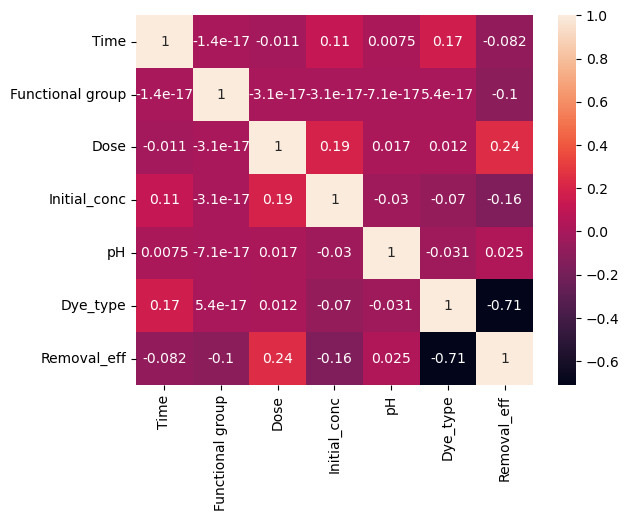

In [45]:
#plt.style.use('classic')
sns.heatmap(corr_matrix, annot=True)

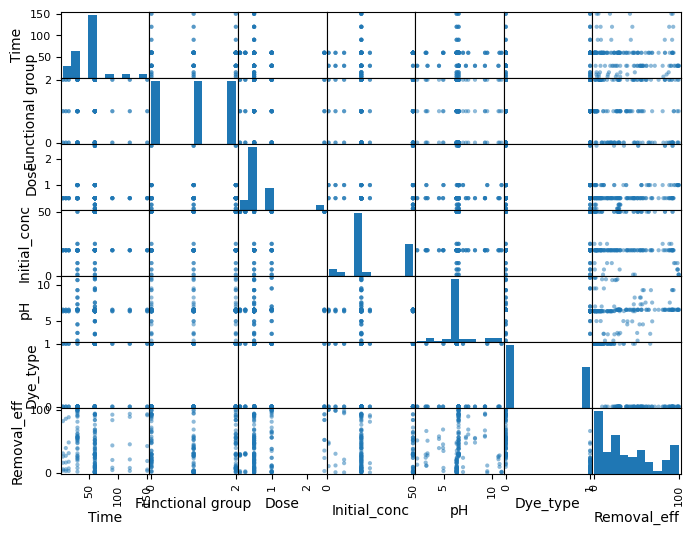

In [46]:
#Plot correlation matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df2, figsize=(8,6))
plt.show()

## Data Preparation

In [48]:
#Here, I use OneHot encoded dataFrame because ordinal (or Label encoder) is often bias when the feature has no specific order
#input

input_data = df_encoded.drop('Removal_eff', axis=1)
X = input_data.values
y = data['Removal_eff'].values

print('Data shape:', X.shape, y.shape)

Data shape: (174, 9) (174,)


In [49]:
#Split the set into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

len(y_test), len(y_train)

(44, 130)

In [50]:
# Scale the data, store it with unique name for later comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)

#Apply same to test set
X_test_sc = scaler.transform(X_test)

#All data
X_sc = scaler.transform(X)

In [51]:
## Instantiate the classifiers

#Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)

#ANN
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=10000, activation='tanh')

#SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=.0001)
svr_lin = SVR(kernel='linear', C=10, gamma='auto')
svr_poly = SVR(kernel='poly', C=10, gamma='auto', degree=3, epsilon=0.0001, coef0=1)

### Learning curves

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#define a function for plotting learning curves

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=1)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.xlabel("Training Set size")
  plt.ylabel("RMSE")
  plt.legend()


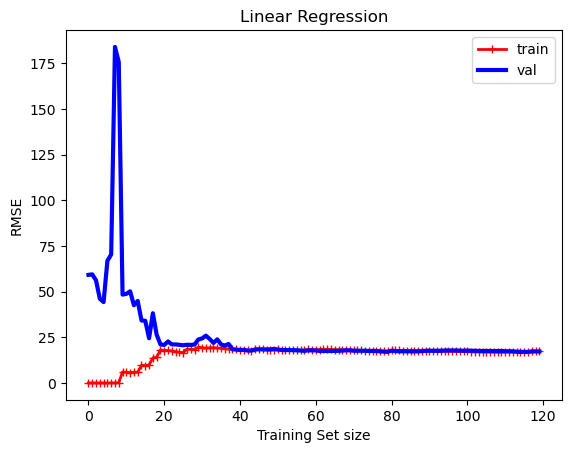

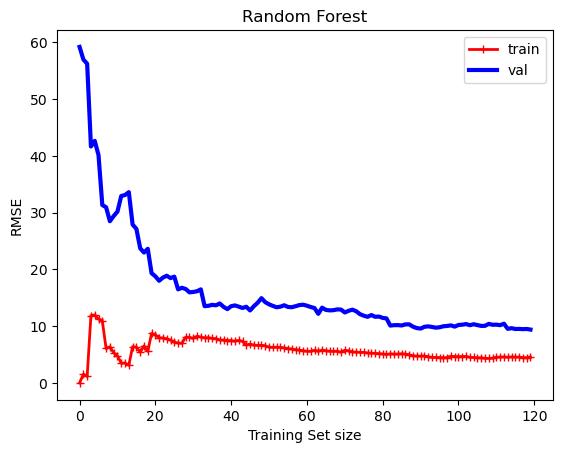

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_networ

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_networ

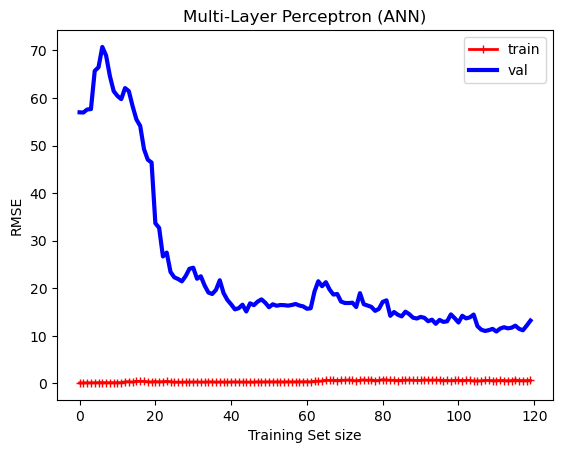

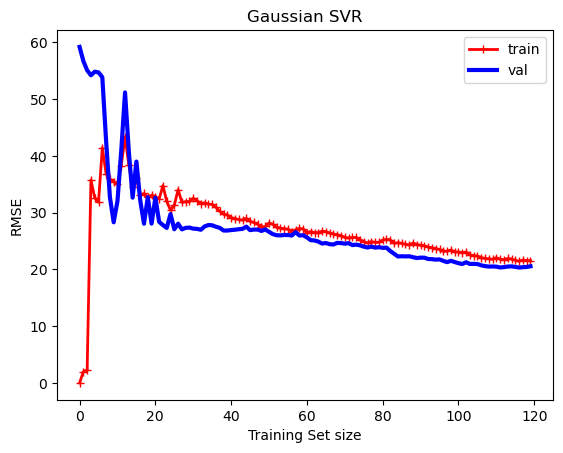

In [53]:
plot_learning_curves(linreg, X, y)
plt.title('Linear Regression')
plt.show();

plot_learning_curves(rf, X_sc, y)
plt.title('Random Forest')
plt.show();

plot_learning_curves(mlp, X_sc, y)
plt.title('Multi-Layer Perceptron (ANN)')
plt.show();

plot_learning_curves(svr_rbf, X_sc, y)
plt.title('Gaussian SVR')
plt.show();

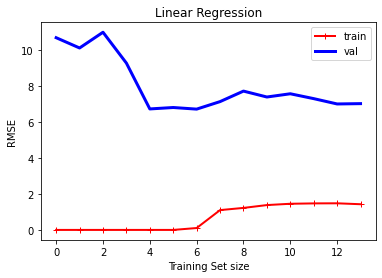

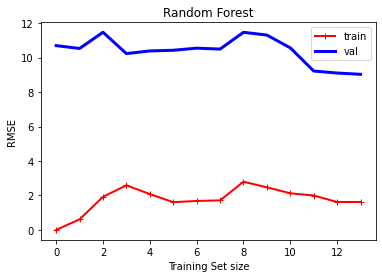

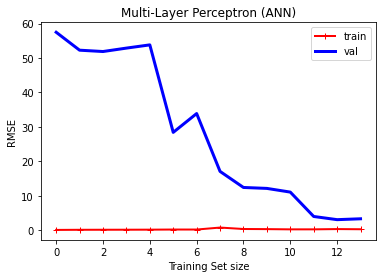

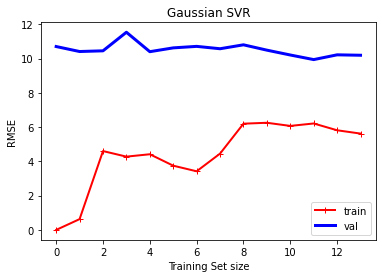

In [15]:
plot_learning_curves(linreg, X_train_sc, y_train)
plt.title('Linear Regression')
plt.show()

plot_learning_curves(rf, X_train_sc, y_train)
plt.title('Random Forest')
plt.show()

plot_learning_curves(mlp, X_train_sc, y_train)
plt.title('Multi-Layer Perceptron (ANN)')
plt.show()

plot_learning_curves(svr_rbf, X_train_sc, y_train)
plt.title('Gaussian SVR')
plt.show()

## Linear Regression

### Simple linear

In [54]:
linreg.fit(X_train,y_train)
lreg = LinearRegression()
lreg.fit(X_train_sc,y_train)

print("TEST Accuracy (non-standardized):", linreg.score(X_test,y_test))
print("TEST Accuracy (standardized):", lreg.score(X_test_sc,y_test))
print("TRAIN Accuracy (non-standardized):", linreg.score(X_train,y_train))
print("TRAIN Accuracy (standardized):", lreg.score(X_train_sc,y_train))

TEST Accuracy (non-standardized): 0.4835645031335858
TEST Accuracy (standardized): 0.48356450313358423
TRAIN Accuracy (non-standardized): 0.7197029809190534
TRAIN Accuracy (standardized): 0.7197029809190534


In [55]:
#lr = LinearRegression()
#lr.fit(X,y)

linreg.predict(X)

linreg.score(X,y)

0.6943536262460339

##### *****From above, Linear Regression cannot be said to be affected by standardization****

## Polynomial Regression

TEST accuracy (R-sq): 0.4836
TRAIN accuracy (R-sq): 0.7197
TEST CORR: 0.7675
TRAIN CORR: 0.8484
Test RMSE: 17.673
Train RMSE: 17.237


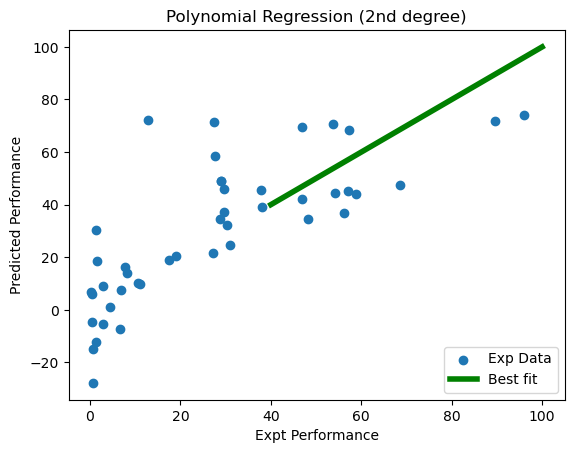

In [56]:
from sklearn.preprocessing import PolynomialFeatures
#Prepare the data for polynomial feature transformation

nb_degree = 1  #To ease changing of the values

#Instantiate the import
polynomial_features = PolynomialFeatures(degree = nb_degree)

#Apply the transform to both training and testing data
X_train_transf = polynomial_features.fit_transform(X_train)
X_test_transf = polynomial_features.fit_transform(X_test)

#Instantiate and train the model

model = LinearRegression()
model.fit(X_train_transf, y_train)
y_tr_poly_pred = model.predict(X_train_transf)
#model.score(X_train_transf,y_tr_poly_pred)

y_ts_poly_pred = model.predict(X_test_transf)
print("TEST accuracy (R-sq):", model.score(X_test_transf,y_test).round(4))
print("TRAIN accuracy (R-sq):", model.score(X_train_transf,y_train).round(4))
print("TEST CORR:", np.corrcoef(y_test,y_ts_poly_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_poly_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_poly_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_poly_pred)).round(3))
# model.score(X_test,y_test)

plt.scatter(y_test,y_ts_poly_pred, label='Exp Data')
plt.plot((40,100),(40,100), label='Best fit', color='g', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Polynomial Regression (2nd degree)')
plt.legend(loc='lower right')
plt.show()
#print('MODEL Coefficients:', model.coef_.round(3))
#print('MODEL Intercept:', model.intercept_.round(3))

TEST accuracy (R-sq): -4.1288
TRAIN accuracy (R-sq): 0.9568
TEST CORR: 0.3507
TRAIN CORR: 0.9781
Test RMSE: 55.694
Train RMSE: 6.771


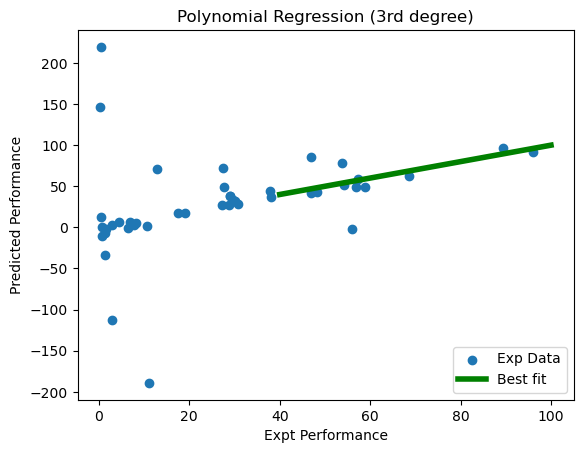

In [57]:
# 3rd degree
from sklearn.preprocessing import PolynomialFeatures

#nb_degree = 3  #To ease changing of the values

#Instantiate the import
polynomial_features3 = PolynomialFeatures(degree = 3)

#Apply the transform to both training and testing data
X_train_transf3 = polynomial_features3.fit_transform(X_train)
X_test_transf3 = polynomial_features3.fit_transform(X_test)

#Instantiate and train the model

model3 = LinearRegression()
model3.fit(X_train_transf3, y_train)
y_tr_poly_pred3 = model3.predict(X_train_transf3)
#model.score(X_train_transf,y_tr_poly_pred)

y_ts_poly_pred3 = model3.predict(X_test_transf3)
print("TEST accuracy (R-sq):", model3.score(X_test_transf3,y_test).round(4))
print("TRAIN accuracy (R-sq):", model3.score(X_train_transf3,y_train).round(4))
print("TEST CORR:", np.corrcoef(y_test,y_ts_poly_pred3)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_poly_pred3)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_poly_pred3)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_poly_pred3)).round(3))
# model.score(X_test,y_test)

plt.scatter(y_test,y_ts_poly_pred3, label='Exp Data')
plt.plot((40,100),(40,100), label='Best fit', color='g', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Polynomial Regression (3rd degree)')
plt.legend(loc='lower right')
plt.show()
#print('MODEL Coefficients:', model3.coef_.round(3))
#print('MODEL Intercept:', model.intercept_.round(3))

TEST accuracy (R-sq): 0.4836
TRAIN accuracy (R-sq): 0.7197
TEST CORR: 0.7675
TRAIN CORR: 0.8484
Test RMSE: 17.673
Train RMSE: 17.237


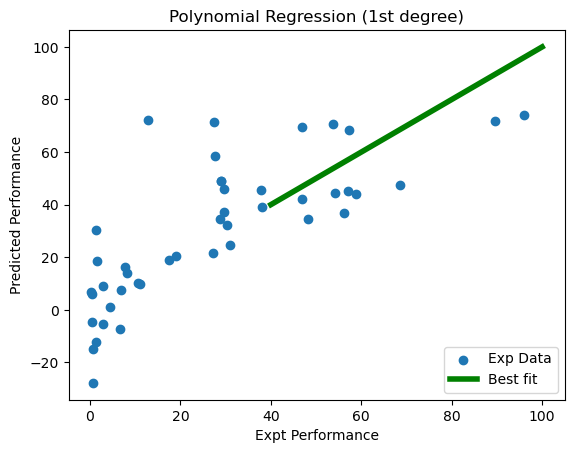

In [58]:
#Instantiate the import
polynomial_features1 = PolynomialFeatures(degree = 1)

#Apply the transform to both training and testing data
X_train_transf1 = polynomial_features1.fit_transform(X_train)
X_test_transf1 = polynomial_features1.fit_transform(X_test)

#Instantiate and train the model

model1 = LinearRegression()
model1.fit(X_train_transf1, y_train)
y_tr_poly_pred1 = model1.predict(X_train_transf1)
#model.score(X_train_transf,y_tr_poly_pred)

y_ts_poly_pred1 = model1.predict(X_test_transf1)
print("TEST accuracy (R-sq):", model1.score(X_test_transf1,y_test).round(4))
print("TRAIN accuracy (R-sq):", model1.score(X_train_transf1,y_train).round(4))
print("TEST CORR:", np.corrcoef(y_test,y_ts_poly_pred1)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_poly_pred1)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_poly_pred1)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_poly_pred1)).round(3))
# model.score(X_test,y_test)

plt.scatter(y_test,y_ts_poly_pred1, label='Exp Data')
plt.plot((40,100),(40,100), label='Best fit', color='g', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Polynomial Regression (1st degree)')
plt.legend(loc='lower right')
plt.show()
#print('MODEL Coefficients:', model3.coef_.round(3))
#print('MODEL Intercept:', model.intercept_.round(3))

#### Linear Regression by OLS

In [ ]:
import statsmodels.api as sn

#Define input vs output, then split into training and testing
X1 = input_data
y1 = data['performance']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

len(y1_test)

#Add constant manually as expected when using OLS
X1_train_const = sn.add_constant(X1_train)
X1_test_const = sn.add_constant(X1_test)

#Create/train least square model
lm_model = sn.OLS(y1_train, X1_train_const).fit()

In [ ]:
#To view the model, run
lm_model.summary()

## Random Forest

In [59]:
# Import libraries for cross val and grid search
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, cross_val_predict

In [60]:
#Define function for the model for ease re-use

def rfr_model(X,y):
    
    #Perform grid search
    gsc = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid={'max_depth': range(3,10),
                                   'n_estimators': (5, 10, 50, 100, 1000),
                                  }, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X,y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                               n_estimators=best_params["n_estimators"],
                               random_state=False, verbose=False)
    
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_absolute_error')
    predictions = cross_val_predict(rfr, X, y, cv=5)
    
    return scores, best_params, scores.mean(axis=0)

#To get the list of values predicted using the model
#predictions = cross_val_predict(rfr, X, y, cv=10)

In [61]:
# Use the function to optimize the parameters

rfr_model(X_train_sc,y_train)
#scores.sum(axis=1)

(array([ -7.26067097,  -8.06469788,  -8.63281096,  -8.63378285,
        -10.94721074]),
 {'max_depth': 9, 'n_estimators': 50},
 -8.707834678486321)

In [ ]:
'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

Random Forest TEST R-sq:  0.6480230513498779
Random Forest TRAIN R-sq:  0.8376998277111654
TEST CORR: 0.846
TRAIN CORR: 0.9177
Test RMSE: 14.59
Train RMSE: 13.116


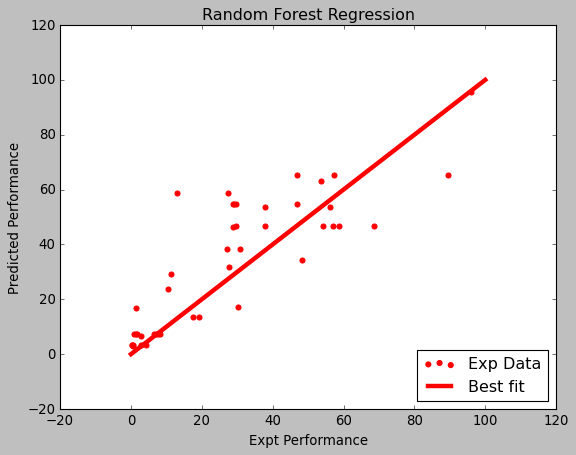

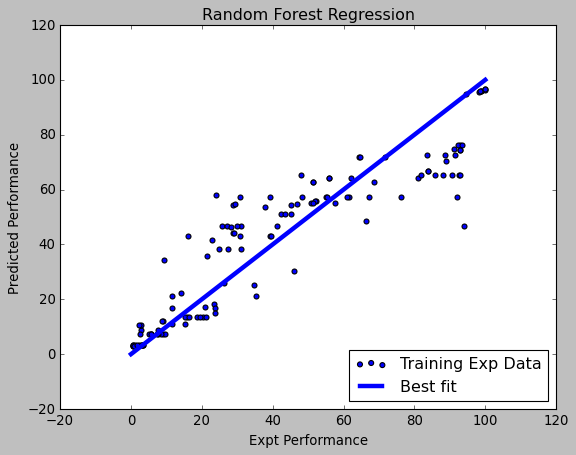

In [69]:
#Apply optimized parameters in the random forest regressor
rfr = RandomForestRegressor(max_depth=4,
                               n_estimators=10,
                               random_state=42, verbose=False)
rfr.fit(X_train_sc,y_train)

y_ts_rf_pred = rfr.predict(X_test_sc)
y_tr_rf_pred = rfr.predict(X_train_sc)

print('Random Forest TEST R-sq: ', rfr.score(X_test_sc, y_test))
print('Random Forest TRAIN R-sq: ', rfr.score(X_train_sc, y_train))

print("TEST CORR:", np.corrcoef(y_test,y_ts_rf_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_rf_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_rf_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_rf_pred)).round(3))

plt.scatter(y_test,y_ts_rf_pred, label='Exp Data', color='r')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Random Forest Regression')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_rf_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Random Forest Regression')
plt.legend(loc='lower right')
plt.show()

In [128]:
y_ts_rf_pred

array([40.701     , 55.46808889, 67.255     , 55.46808889, 48.308     ,
       55.46808889, 63.8912    , 58.961     ])

In [132]:
print(y_ts_svr_pred)
print(y_ts_svrg_pred)
print(y_ts_svrp_pred)
y_test

[43.93620486 55.58217    60.78051475 55.58217    51.7621268  54.43912058
 59.55276135 54.36891978]
[40.170524   55.93941269 60.9851884  55.93941269 48.41751414 54.86480399
 59.43416192 55.46190444]
[46.55427756 55.08170646 63.59766785 55.08170646 55.73576204 55.33954091
 57.80347978 52.30958758]


array([47.05, 56.35, 60.37, 55.62, 51.71, 52.22, 65.16, 58.21])

In [101]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': False,
 'warm_start': False}

### Feature importance

In [63]:
pd.Series(rfr.feature_importances_)

0    0.022056
1    0.094442
2    0.099958
3    0.086922
4    0.029473
5    0.049295
6    0.004623
7    0.251086
8    0.362146
dtype: float64

In [64]:
# Using random forest's in-built function

ft_imp = pd.Series(rfr.feature_importances_).sort_values(ascending=False)
print(ft_imp)
input_data.columns

8    0.362146
7    0.251086
2    0.099958
1    0.094442
3    0.086922
5    0.049295
4    0.029473
0    0.022056
6    0.004623
dtype: float64


Index(['Time', 'Dose', 'Initial_conc', 'pH', 'Functional group_COOH',
       'Functional group_MSN', 'Functional group_SH', 'Dye_type_CV',
       'Dye_type_MO'],
      dtype='object')

[0.02966037 0.09950167 0.11128656 0.09365106 0.04770291 0.07086333
 0.0039071  0.20858484 0.42542133]


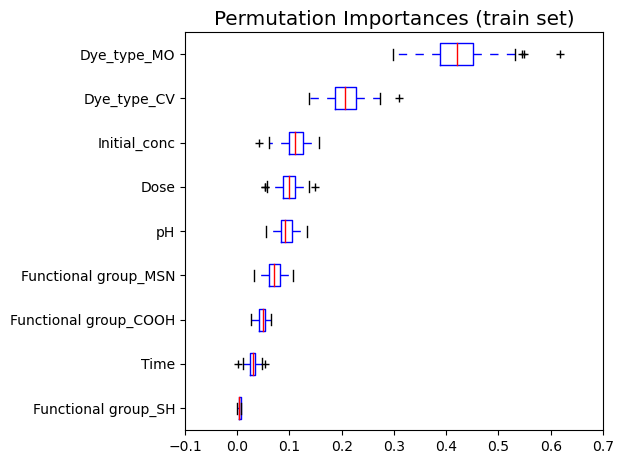

In [65]:
# Using probability-based permutation function

from sklearn.inspection import permutation_importance

result = permutation_importance(rfr, X_train_sc, y_train, n_repeats=100, random_state=0)
print(result.importances_mean)
result.importances_std

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
plt.style.use('classic')
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=input_data.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

[ 0.02031301  0.13502024  0.18540114  0.10470745  0.02091924 -0.02073285
 -0.00321069  0.24522847  0.57034672]


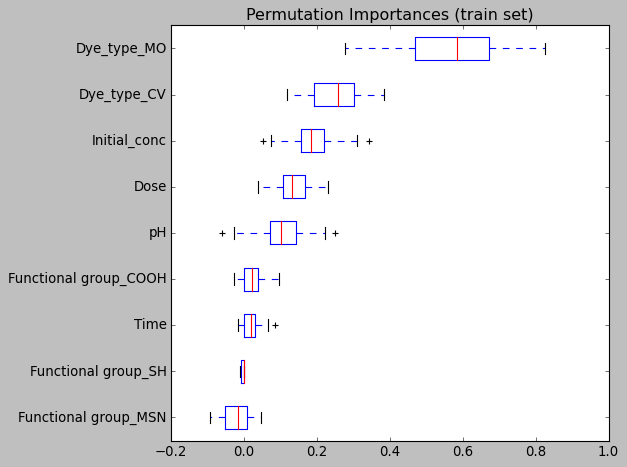

In [90]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rfr, X_test_sc, y_test, n_repeats=100, random_state=0)
print(result.importances_mean)
result.importances_std

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
plt.style.use('classic')
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=input_data.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Support Vector Regression

### Linear kernel

In [66]:
# define function
def svr_lin(X, y):
    gsc = GridSearchCV(estimator=SVR(kernel='linear'),
                      param_grid={'C': [0.1, 1, 10, 100, 1000],
                                 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                                 }, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    best_svr = SVR(kernel='linear', C=best_params["C"], epsilon=best_params["epsilon"], coef0=0.1, shrinking=True,
              tol=0.001, cache_size=200, verbose=False, max_iter=-1)

    scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}
    scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
    
    return best_params, "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean()))

# Run
print(svr_lin(X_train_sc, y_train))

({'C': 10, 'epsilon': 1}, 'MAE :', 13.612803634789486, '| RMSE :', 18.92887053000252)


Linear-SVR TEST R-sq:  0.5206236605289364
Linear-SVR TRAIN R-sq:  0.6943329012070587
TEST CORR: 0.765
TRAIN CORR: 0.8383
Test RMSE: 17.027
Train RMSE: 18.0


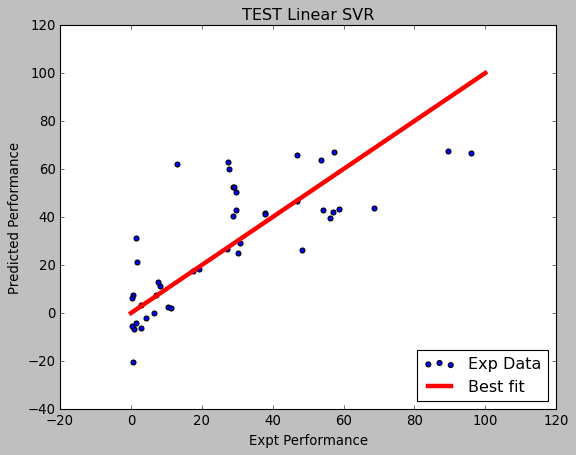

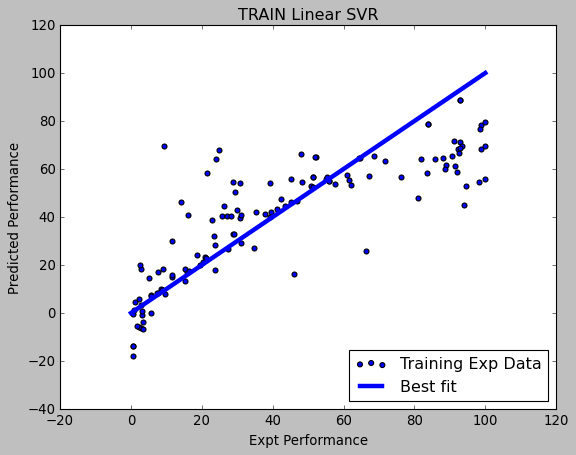

In [68]:
svr_lin = SVR(kernel='linear', C=1, epsilon=1)


svr_lin.fit(X_train_sc,y_train)

y_ts_svr_pred = svr_lin.predict(X_test_sc)
y_tr_svr_pred = svr_lin.predict(X_train_sc)

print('Linear-SVR TEST R-sq: ', svr_lin.score(X_test_sc, y_test))
print('Linear-SVR TRAIN R-sq: ', svr_lin.score(X_train_sc, y_train))

print("TEST CORR:", np.corrcoef(y_test,y_ts_svr_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_svr_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_svr_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_svr_pred)).round(3))

plt.scatter(y_test,y_ts_svr_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TEST Linear SVR')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_svr_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TRAIN Linear SVR')
plt.legend(loc='lower right')
plt.show()

### Polynomial SVR

In [70]:
# define function
def svr_poly(X, y):
    gsc = GridSearchCV(estimator=SVR(kernel='poly'),
                      param_grid={'C': [0.1, 1, 10, 100, 1000],
                                 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                                  'degree': [2,3,4],
                                  'coef0': [0.1, 0.01, 0.001, 0.0001]},
                       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    best_svr = SVR(kernel='poly', C=best_params["C"], epsilon=best_params["epsilon"], coef0=best_params["coef0"],
                   degree=best_params["degree"],shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1)

    scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}
    scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
    
    return best_params, "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean()))

# Run
print(svr_poly(X_train_sc, y_train))

({'C': 100, 'coef0': 0.1, 'degree': 2, 'epsilon': 0.5}, 'MAE :', 9.363293640395714, '| RMSE :', 15.031135062892321)


Polynomial-SVR TEST R-sq:  0.4976
Polynomial-SVR TRAIN R-sq:  0.8643
TEST CORR: 0.8022
TRAIN CORR: 0.9309
Test RMSE: 17.431
Train RMSE: 11.993


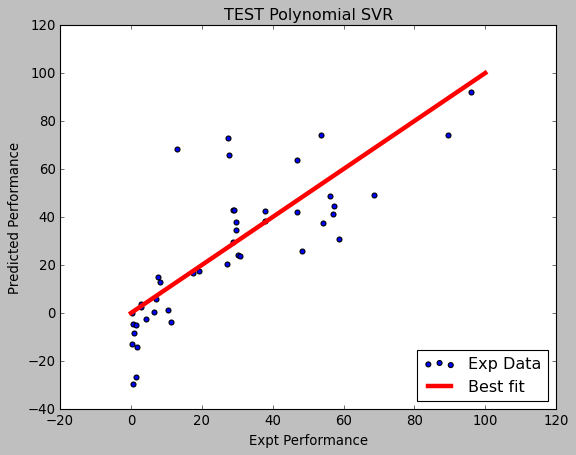

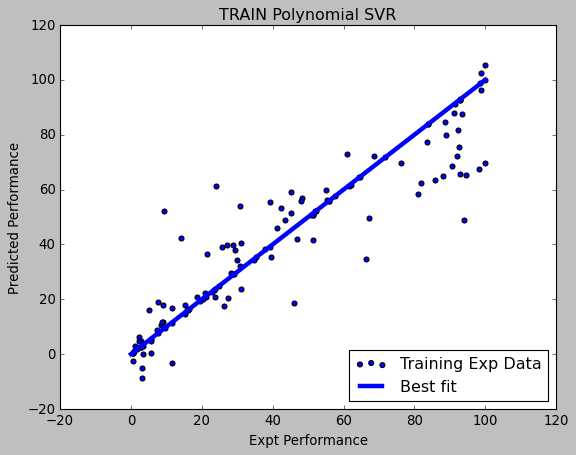

In [75]:
svr_poly = SVR(kernel='poly', degree=2, coef0=0.1, C=100, epsilon=0.05)


svr_poly.fit(X_train_sc,y_train)

y_ts_svrp_pred = svr_poly.predict(X_test_sc)
y_tr_svrp_pred = svr_poly.predict(X_train_sc)

print('Polynomial-SVR TEST R-sq: ', svr_poly.score(X_test_sc, y_test).round(4))
print('Polynomial-SVR TRAIN R-sq: ', svr_poly.score(X_train_sc, y_train).round(4))

print("TEST CORR:", np.corrcoef(y_test,y_ts_svrp_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_svrp_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_svrp_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_svrp_pred)).round(3))

plt.scatter(y_test,y_ts_svrp_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TEST Polynomial SVR')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_svrp_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TRAIN Polynomial SVR')
plt.legend(loc='lower right')
plt.show()

### Gausian (RBF kernel) SVR

In [76]:
# define function
def svr_rbf(X, y):
    gsc = GridSearchCV(estimator=SVR(kernel='rbf'),
                      param_grid={'C': [0.1, 1, 10, 100, 1000],
                                 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                                  #'degree': [2,3,4],
                                  'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
                       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],coef0=0.1,
                   shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1)

    scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}
    scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
    
    return best_params, "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean()))

# Run
print(svr_rbf(X_train_sc, y_train))

({'C': 100, 'epsilon': 0.0001, 'gamma': 0.1}, 'MAE :', 7.086475378761835, '| RMSE :', 12.085608823753297)


Gaussian-SVR TEST R-sq:  0.7535
Gaussian-SVR TRAIN R-sq:  0.979
TEST CORR: 0.882
TRAIN CORR: 0.9896
Test RMSE: 12.211
Train RMSE: 4.718


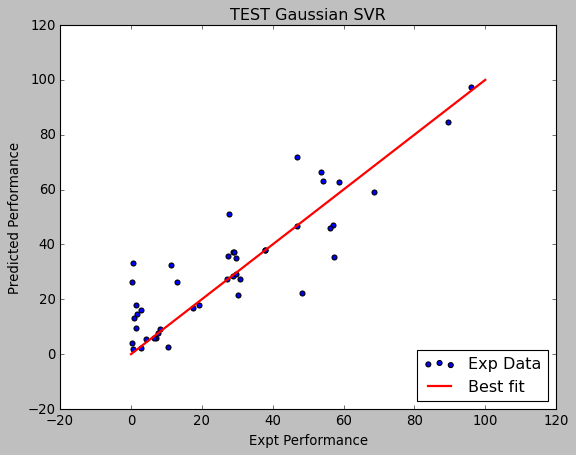

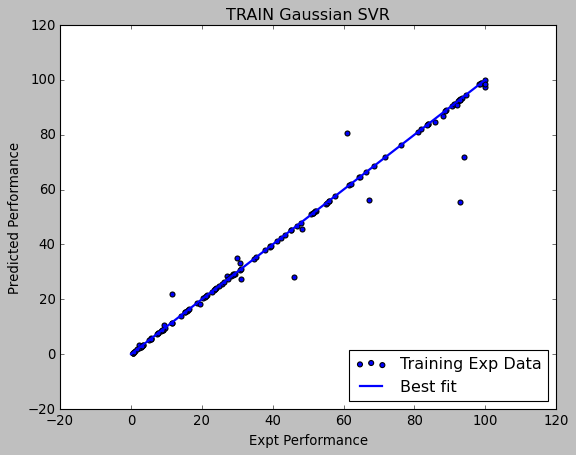

In [84]:
svr_rbf = SVR(kernel='rbf', coef0=0.1, C=100, epsilon=0.0001, gamma=0.4)


svr_rbf.fit(X_train_sc,y_train)

y_ts_svrg_pred = svr_rbf.predict(X_test_sc)
y_tr_svrg_pred = svr_rbf.predict(X_train_sc)

print('Gaussian-SVR TEST R-sq: ', svr_rbf.score(X_test_sc, y_test).round(4))
print('Gaussian-SVR TRAIN R-sq: ', svr_rbf.score(X_train_sc, y_train).round(4))

print("TEST CORR:", np.corrcoef(y_test,y_ts_svrg_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_svrg_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_svrg_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_svrg_pred)).round(3))

plt.scatter(y_test,y_ts_svrg_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=2)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TEST Gaussian SVR')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_svrg_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=2)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TRAIN Gaussian SVR')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#svr_rbf.get_params()
#svr_poly.get_params()
#svr_lin.get_params()

## Multilayer Perceptron (Neural Network)

In [ ]:
# Number of hidden layer was tested from 2 to 20, the best was found to be 14

Multilayer Percenptron TEST R-sq:  0.8244
Multilayer Percenptron TRAIN R-sq:  0.9863
TEST CORR: 0.9321
TRAIN CORR: 0.9932
Test RMSE: 10.306
Train RMSE: 3.808


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


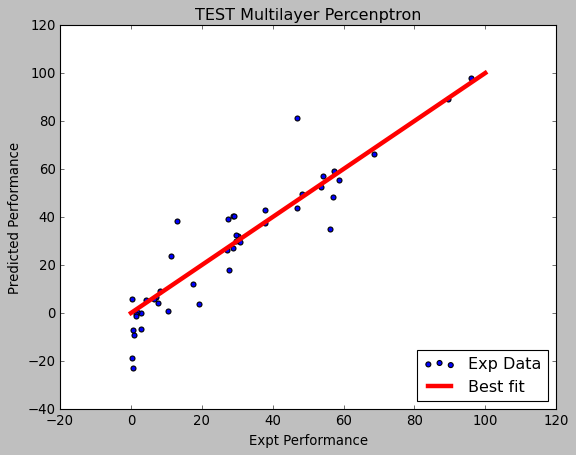

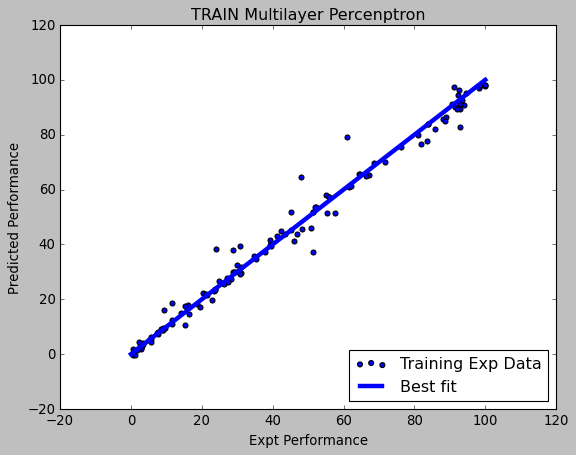

In [89]:
mlp = MLPRegressor(hidden_layer_sizes=(20,), activation='tanh', max_iter=10000, verbose=0, random_state=2) #, n_jobs=-1)

mlp.fit(X_train_sc,y_train)

y_ts_mlp_pred = mlp.predict(X_test_sc)
y_tr_mlp_pred = mlp.predict(X_train_sc)

print('Multilayer Percenptron TEST R-sq: ', mlp.score(X_test_sc, y_test).round(4))
print('Multilayer Percenptron TRAIN R-sq: ', mlp.score(X_train_sc, y_train).round(4))

print("TEST CORR:", np.corrcoef(y_test,y_ts_mlp_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_mlp_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_mlp_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_mlp_pred)).round(3))

plt.scatter(y_test,y_ts_mlp_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TEST Multilayer Percenptron')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_mlp_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TRAIN Multilayer Percenptron')
plt.legend(loc='lower right')
plt.show()

In [86]:
#mlp_model(X_train_sc,y_train)
mlp.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (15,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 10000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 8,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Effect of parameters

In [ ]:
effects = pd.read_csv('effects_of_factors.csv')
effects.head()

In [ ]:
test_effects = effects.drop('performance', axis=1)
print(test_effects.head(2))

test_effects_sc = scaler.transform(test_effects)


In [ ]:
#test_effects_val = test_effects.values
#test_effects_val
#test_effects_val_sc = scaler.transform(test_effects_val)

In [ ]:
#mlp_effects_val = mlp.predict(test_effects_val_sc)

#y_mlp_effects_val = mlp_effects_val.tolist()
#y_mlp_effects_val

#convert list to dataframe
#y_mlp_effects_val_df = pd.DataFrame(y_mlp_effects_val, columns=['ANN_effects_val'])
#y_mlp_effects_val_df
#y_mlp_effects_val_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\results\mlp_effects_val_output2.csv', index = False)

In [ ]:
lreg.predict()
model.predict()

rfr.predict()

svr_lin.predict()
svr_poly.predict()
svr_rbf.predict()

mlp.predict()

In [ ]:
#Lin reg

lreg_effects = lreg.predict(test_effects)

y_lreg_effects = lreg_effects.tolist()
#y_lreg_effects

#convert list to dataframe
y_lreg_effects_df = pd.DataFrame(y_lreg_effects, columns=['LINREG_effects'])

y_lreg_effects_df
y_lreg_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\LinReg_effects_output.csv', index = False)



In [ ]:
linreg_all = linreg.predict(X)
y_linreg_all = linreg_all.tolist()

#convert list to dataframe
y_linreg_all_df = pd.DataFrame(y_linreg_all, columns=['linreg_all'])

y_linreg_all_df.head()


In [ ]:
#POLY reg

nb_degree = 2  #To ease changing of the values

#Instantiate the import
polynomial_features = PolynomialFeatures(degree = nb_degree)

#Apply the transform to both training and testing data
test_effects_transf = polynomial_features.fit_transform(test_effects)


polyreg_effects = model.predict(test_effects_transf)

polyreg_effects = polyreg_effects.tolist()
#polyreg_effects

#convert list to dataframe
polyreg_effects_df = pd.DataFrame(polyreg_effects, columns=['POLYReg2_effects'])
polyreg_effects_df
polyreg_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\polyreg_effects_output.csv', index = False)


In [ ]:
nb_degree = 3  #To ease changing of the values

#Instantiate the import
polynomial_features = PolynomialFeatures(degree = nb_degree)

#Apply the transform to all data
X_transf = polynomial_features.fit_transform(X)


polyreg_X = model.predict(X_transf)

polyreg_all = polyreg_X.tolist()
#polyreg_effects

#convert list to dataframe
poly2reg_all_df = pd.DataFrame(polyreg_all, columns=['PolyReg2_all'])

poly2reg_all_df.head()




#y_lreg_all_df
#poly2reg_all_df

In [ ]:
#POLY reg

nb_degree = 3  #To ease changing of the values

#Instantiate the import
polynomial_features3 = PolynomialFeatures(degree = nb_degree)

#Apply the transform to both training and testing data
test_effects_transf = polynomial_features3.fit_transform(test_effects)


polyreg_effectsf = model3.predict(test_effects_transf)

polyreg_effectsf = polyreg_effectsf.tolist()
#polyreg_effects

#convert list to dataframe
polyreg_effectsf_df = pd.DataFrame(polyreg_effectsf, columns=['Poly3_effects'])
polyreg_effectsf_df
polyreg_effectsf_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\polyreg3-deg_effects_output.csv', index = False)


In [ ]:
nb_degree = 3  #To ease changing of the values

#Instantiate the import
polynomial_features3 = PolynomialFeatures(degree = nb_degree)

#Apply the transform to both training and testing data
all_transf = polynomial_features3.fit_transform(X)


poly3reg = model3.predict(all_transf)

poly3reg = poly3reg.tolist()
#polyreg_effects

#convert list to dataframe
poly3reg_all_df = pd.DataFrame(poly3reg, columns=['PolyReg3_all'])

poly3reg_all_df.head()




#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df

In [ ]:
#RForest
rf_effects = rfr.predict(test_effects_sc)

rf_effects = rf_effects.tolist()
#polyreg_effects

#convert list to dataframe
rf_effects_df = pd.DataFrame(rf_effects, columns=['RForest_effects'])
rf_effects_df
rf_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\Rforest_effects_output.csv', index = False)

#PolySVR
polysvr_effects = svr_poly.predict(test_effects_sc)

polysvr_effects = polysvr_effects.tolist()
#polyreg_effects

#convert list to dataframe
polysvr_effects_df = pd.DataFrame(polysvr_effects, columns=['polySVR_effects'])
polysvr_effects_df
polysvr_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\polysvr_effects_output.csv', index = False)

In [ ]:
#RF
rf_all = rfr.predict(X_sc)
rf_all = rf_all.tolist()

rf_all_df = pd.DataFrame(rf_all, columns=['RForest_ALL'])
rf_all_df.head()


In [ ]:
#LinSVR
linsvr_all =svr_lin.predict(X_sc)
linsvr_all = linsvr_all.tolist()

linsvr_all_df = pd.DataFrame(linsvr_all, columns=['linSVR_ALL'])
linsvr_all_df.head()


In [ ]:
#PolySVR
polysvr_all =svr_poly.predict(X_sc)
polysvr_all = polysvr_all.tolist()

polysvr_all_df = pd.DataFrame(polysvr_all, columns=['polySVR_ALL'])
polysvr_all_df.head()


#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df
#rf_all_df
#polysvr_all_df

In [ ]:
#rbfSVR
rbfsvr_effects = svr_rbf.predict(test_effects_sc)

rbfsvr_effects = rbfsvr_effects.tolist()
#polyreg_effects

#convert list to dataframe
rbfsvr_effects_df = pd.DataFrame(rbfsvr_effects, columns=['rbfSVR_effects'])
rbfsvr_effects_df
rbfsvr_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\RBFsvr_effects_output.csv', index = False)

In [ ]:
#rbfSVR
rbfsvr_all =svr_rbf.predict(X_sc)
rbfsvr_all = rbfsvr_all.tolist()

rbfsvr_all_df = pd.DataFrame(rbfsvr_all, columns=['rbfSVR_ALL'])
rbfsvr_all_df.head()


#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df
#rf_all_df
#polysvr_all_df
#rbfsvr_all_df

In [ ]:
#ANN

mlp_effects = mlp.predict(test_effects_sc)

y_mlp_effects = mlp_effects.tolist()
y_mlp_effects

#convert list to dataframe
y_mlp_effects_df = pd.DataFrame(y_mlp_effects, columns=['ANN_effects'])
y_mlp_effects_df
y_mlp_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\mlp_effects_output.csv', index = False)

In [ ]:
#ANN
mlp_all =mlp.predict(X_sc)
mlp_all = mlp_all.tolist()

mlp_all_df = pd.DataFrame(mlp_all, columns=['mlp_ALL'])
mlp_all_df.head()


#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df
#rf_all_df
#polysvr_all_df
#rbfsvr_all_df
#mlp_all_df

In [ ]:
y_mlp_effects.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\results\mlp_effects_output.csv', index = False)

In [ ]:
#TRAIN_TEST OUTPUT
mlp_train = mlp.predict(X_train_sc)
mlp_test = mlp.predict(X_test_sc)

y_mlp_train = mlp_train.tolist()
y_mlp_test = mlp_test.tolist()

#convert list to dataframe
y_mlp_train_df = pd.DataFrame(y_mlp_train, columns=['ANN_train'])
y_mlp_test_df = pd.DataFrame(y_mlp_test, columns=['ANN_test'])

y_mlp_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\mlp_train_output.csv', index = False)
y_mlp_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\mlp_test_output.csv', index = False)

In [ ]:
#TRAIN_TEST OUTPUT
rfr_train = rfr.predict(X_train_sc)
rfr_test = rfr.predict(X_test_sc)

y_rfr_train = rfr_train.tolist()
y_rfr_test = rfr_test.tolist()

#convert list to dataframe
y_rfr_train_df = pd.DataFrame(y_rfr_train, columns=['RF_train'])
y_rfr_test_df = pd.DataFrame(y_rfr_test, columns=['RF_test'])

y_rfr_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\rfr_train_output.csv', index = False)
y_rfr_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\rfr_test_output.csv', index = False)

In [ ]:
#TRAIN_TEST OUTPUT

#PolySVR
polysvr_train = svr_poly.predict(X_train_sc)
polysvr_test = svr_poly.predict(X_test_sc)

y_polysvr_train = polysvr_train.tolist()
y_polysvr_test = polysvr_test.tolist()

#convert list to dataframe
y_polysvr_train_df = pd.DataFrame(y_polysvr_train, columns=['polySVR_train'])
y_polysvr_test_df = pd.DataFrame(y_polysvr_test, columns=['polySVR_test'])

y_polysvr_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\polysvr_train_output.csv', index = False)
y_polysvr_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\polysvr_test_output.csv', index = False)


#rbfSVR
rbfsvr_train = svr_rbf.predict(X_train_sc)
rbfsvr_test = svr_rbf.predict(X_test_sc)

y_rbfsvr_train = rbfsvr_train.tolist()
y_rbfsvr_test = rbfsvr_test.tolist()

#convert list to dataframe
y_rbfsvr_train_df = pd.DataFrame(y_rbfsvr_train, columns=['rbfSVR_train'])
y_rbfsvr_test_df = pd.DataFrame(y_rbfsvr_test, columns=['rbfSVR_test'])

y_rbfsvr_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\rbfsvr_train_output.csv', index = False)
y_rbfsvr_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\rbfsvr_test_output.csv', index = False)


#LinSVR
linsvr_train = svr_lin.predict(X_train_sc)
linsvr_test = svr_lin.predict(X_test_sc)

y_linsvr_train = linsvr_train.tolist()
y_linsvr_test = linsvr_test.tolist()

#convert list to dataframe
y_linsvr_train_df = pd.DataFrame(y_linsvr_train, columns=['linSVR_train'])
y_linsvr_test_df = pd.DataFrame(y_linsvr_test, columns=['linSVR_test'])

y_linsvr_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\linsvr_train_output.csv', index = False)
y_linsvr_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\linsvr_test_output.csv', index = False)

In [ ]:
#TRAIN_TEST_OUTPUT Linear and poly regression


y_polyreg1_train = y_tr_poly_pred1.tolist()
y_polyreg1_test = y_ts_poly_pred1.tolist()

#convert list to dataframe
y_polyreg1_train_df = pd.DataFrame(y_polyreg1_train, columns=['LinReg_train'])
y_polyreg1_test_df = pd.DataFrame(y_polyreg1_test, columns=['LinReg_test'])

y_polyreg1_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\linReg_train_output.csv', index = False)
y_polyreg1_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\linReg_test_output.csv', index = False)


#Deg2poly
y_polyreg_train = y_tr_poly_pred.tolist()
y_polyreg_test = y_ts_poly_pred.tolist()

#convert list to dataframe
y_polyreg_train_df = pd.DataFrame(y_polyreg_train, columns=['Poly2Reg_train'])
y_polyreg_test_df = pd.DataFrame(y_polyreg_test, columns=['Poly2Reg_test'])

y_polyreg_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\Poly2Reg_train_output.csv', index = False)
y_polyreg_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\Poly2Reg_test_output.csv', index = False)



#Deg3poly
y_polyreg3_train = y_tr_poly_pred3.tolist()
y_polyreg3_test = y_ts_poly_pred3.tolist()

#convert list to dataframe
y_polyreg3_train_df = pd.DataFrame(y_polyreg3_train, columns=['Poly3Reg_train'])
y_polyreg3_test_df = pd.DataFrame(y_polyreg3_test, columns=['Poly3Reg_test'])

y_polyreg3_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\Poly3Reg_train_output.csv', index = False)
y_polyreg3_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\Poly3Reg_test_output.csv', index = False)

In [ ]:
#Deg3poly
y_tr = y_train.tolist()
y_ts = y_test.tolist()

#convert list to dataframe
y_train_df = pd.DataFrame(y_tr, columns=['y_train'])
y_test_df = pd.DataFrame(y_ts, columns=['y_test'])

y_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\train_output.csv', index = False)
y_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\test_output.csv', index = False)

In [ ]:
# Create some Pandas dataframes from some data.
 #    y_train_df = pd.DataFrame(y_tr, columns=['y_train'])
 #    y_test_df = pd.DataFrame(y_ts, columns=['y_test'])

# Create a Pandas Excel writer using XlsxWriter as the engine.
train_test_writer = pd.ExcelWriter('all_train_test_output.xlsx', engine='xlsxwriter')


# Write each dataframe to a different worksheet.
y_train_df.to_excel(train_test_writer, sheet_name='traindata') 
y_test_df.to_excel(train_test_writer, sheet_name='testdata')  

y_polyreg_train_df.to_excel(train_test_writer, sheet_name='2degpolytrain') 
y_polyreg_test_df.to_excel(train_test_writer, sheet_name='2degpolytest') 

y_polysvr_train_df.to_excel(train_test_writer, sheet_name='polySVRtrain') 
y_polysvr_test_df.to_excel(train_test_writer, sheet_name='polySVRtest') 

y_rfr_train_df.to_excel(train_test_writer, sheet_name='RFtrain') 
y_rfr_test_df.to_excel(train_test_writer, sheet_name='RFtest') 

y_mlp_train_df.to_excel(train_test_writer, sheet_name='ANNtrain') 
y_mlp_test_df.to_excel(train_test_writer, sheet_name='ANNtest') 


# Close the Pandas Excel writer and output the Excel file.
train_test_writer.save()


In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
all_output_writer = pd.ExcelWriter('all_output.xlsx', engine='xlsxwriter')


# Write each dataframe to a different worksheet.
y_linreg_all_df.to_excel(all_output_writer, sheet_name='LinReg')
poly2reg_all_df.to_excel(all_output_writer, sheet_name='poly2reg')
poly3reg_all_df.to_excel(all_output_writer, sheet_name='poly3reg') 
rf_all_df.to_excel(all_output_writer, sheet_name='RF') 
linsvr_all_df.to_excel(all_output_writer, sheet_name='linSVR')
polysvr_all_df.to_excel(all_output_writer, sheet_name='polySVR')
rbfsvr_all_df.to_excel(all_output_writer, sheet_name='rbfSVR')
mlp_all_df.to_excel(all_output_writer, sheet_name='ANN')


# Close the Pandas Excel writer and output the Excel file.
all_output_writer.save()


#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df
#rf_all_df
#polysvr_all_df
#rbfsvr_all_df
#mlp_all_df

In [ ]:
# To EXPLAIN any of the models, use this;

pip install lib

lib.explain(model)